In [82]:
# Import libraries
import IPython
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set up any configuration, options, or magic commands
%matplotlib inline

In [83]:
# import os
# path = os.getcwd()
# path

In [84]:
#Loading the dataset from drive using pandas
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


A big insight from the dataset is that most features have continuous numeric values ​​as feature inputs and no categorical features, so we don't need to do anything about handing categorical values.

In [26]:
"""
Columns info
'baseline value'- FHR baseline (beats per minute) (it contains values from 106 to 160)

Baseline Fetal Heart Rate (FHR): This is the average heart rate of the fetus over a 10-minute period,
excluding accelerations and decelerations. It is measured in beats per minute (BPM).
The baseline FHR is an essential parameter in CTG interpretation,
as deviations from the normal range can indicate potential issues with the fetus's well-being.
The normal baseline FHR typically ranges from 110 to 160 BPM.

'accelerations'- Number of accelerations per second

Fetal heart rate accelerations are temporary, abrupt increases in the fetal heart rate above the baseline.
The presence of accelerations is generally a positive sign during labor and indicates fetal well-being.

'fetal_movement'- Number of fetal movements per second
'uterine_contractions'- Number of uterine contractions per second
'light_decelerations'- Number of light decelerations per second
'severe_decelerations'- Number of severe decelerations per second
'prolongued_decelerations'- Number of prolonged decelerations per second
'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
'mean_value_of_short_term_variability'- Mean value of short term variability
'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
'mean_value_of_long_term_variability'- Mean value of long term variability
'histogram_width'- Width of FHR histogram
'histogram_min'- Minimum (low frequency) of FHR histogram
'histogram_max'- Maximum (high frequency) of FHR histogram
'histogram_number_of_peaks'- Number of histogram peaks
'histogram_number_of_zeroes'- Number of histogram zeros
'histogram_mode'- Histogram mode
'histogram_mean'- Histogram mean
'histogram_median'- Histogram median
'histogram_variance'- Histogram variance
'histogram_tendency'- Histogram tendency
"""

"\nColumns info\n'baseline value'- FHR baseline (beats per minute) (it contains values from 106 to 160)\n\nBaseline Fetal Heart Rate (FHR): This is the average heart rate of the fetus over a 10-minute period,\nexcluding accelerations and decelerations. It is measured in beats per minute (BPM).\nThe baseline FHR is an essential parameter in CTG interpretation,\nas deviations from the normal range can indicate potential issues with the fetus's well-being.\nThe normal baseline FHR typically ranges from 110 to 160 BPM.\n\n'accelerations'- Number of accelerations per second\n\nFetal heart rate accelerations are temporary, abrupt increases in the fetal heart rate above the baseline.\nThe presence of accelerations is generally a positive sign during labor and indicates fetal well-being.\n\n'fetal_movement'- Number of fetal movements per second\n'uterine_contractions'- Number of uterine contractions per second\n'light_decelerations'- Number of light decelerations per second\n'severe_decelerati

In [27]:
# Getting the dataset's overall description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [28]:
# We've already seen that there are no missing values, however still cross checking if there are any null values
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          


Here we can see that this dataset has no null values, and thus we don't have to do anything extra regarding the handling of null values.


In [29]:
# Getting the dataset's overall statistical description
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In the data description, we can see that the mean value of each feature is of **different** lengths, therefore feature scaling has to be done.

In [30]:
# Getting the dataset's rows and columns length using shape function
df.shape

(2126, 22)

<Axes: >

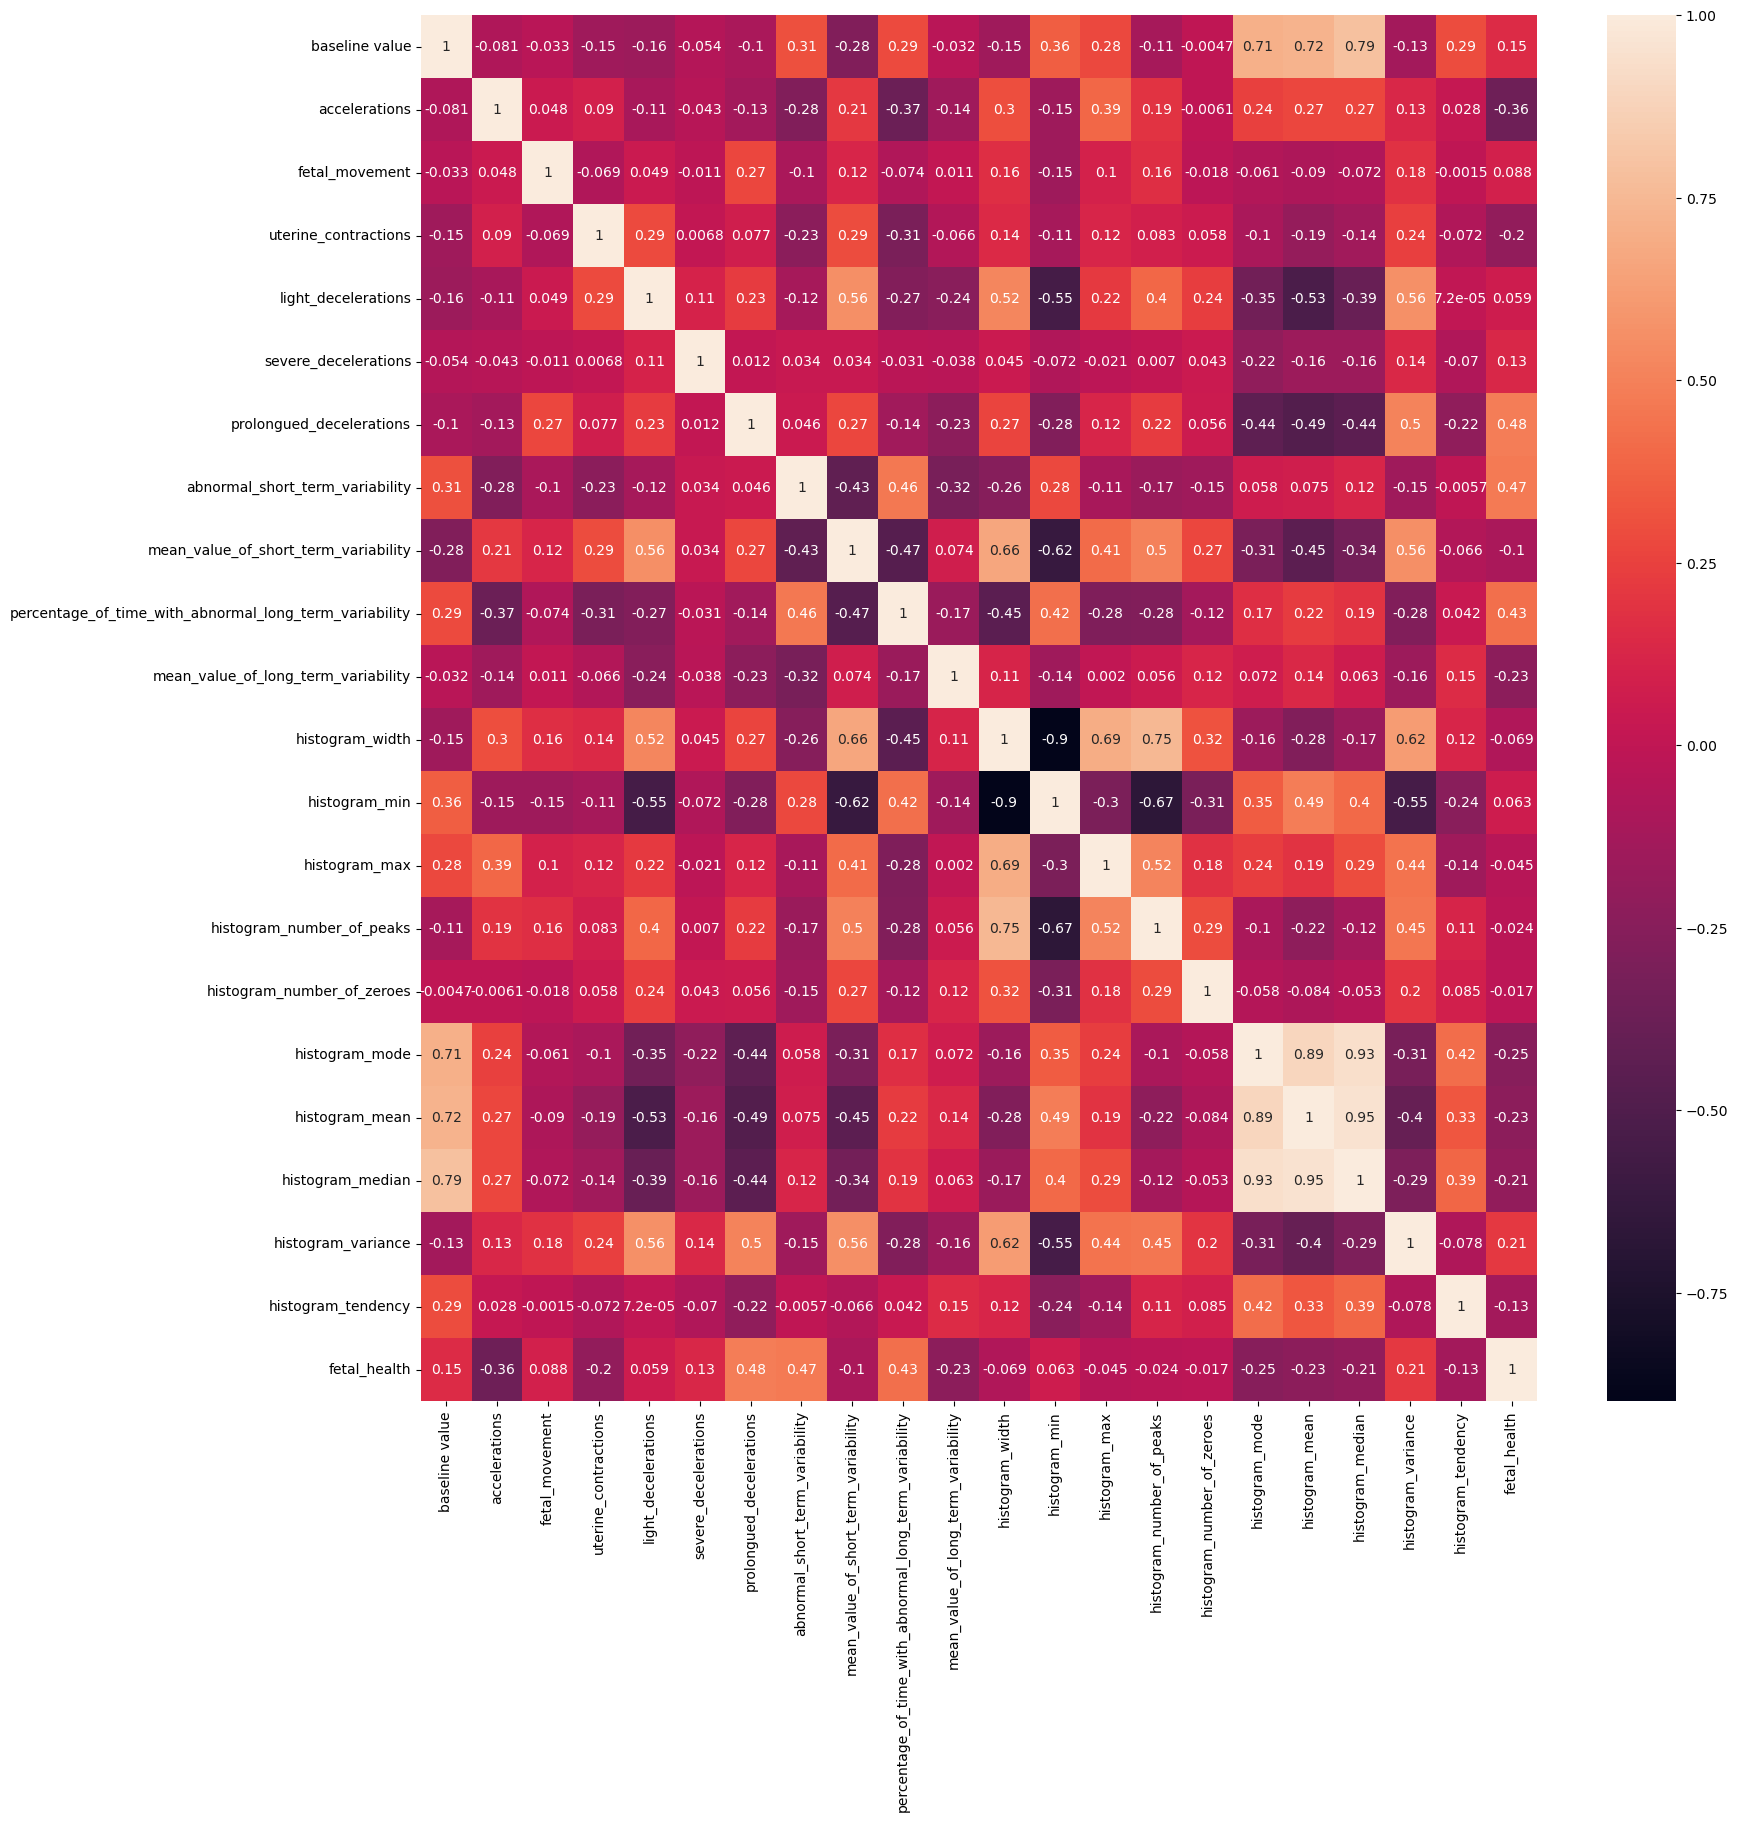

In [31]:
# Plotting the correlation heatmap using seaborn and matplotlib
plt.subplots(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True)

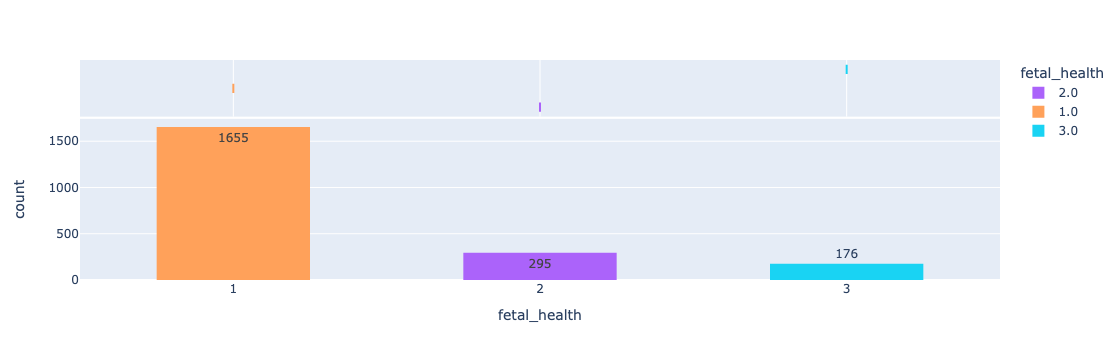

In [32]:
#Drawing a histogram and a boxplot to visualise the distribution of the fetal health
fig = px.histogram(df, x="fetal_health", color = "fetal_health",
                   nbins=3, histnorm=None, category_orders=dict(fetal_health=["1", "2", "3"]),
                   marginal="box", text_auto=True,)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
# showing the plot
fig.show()


In [33]:
X = df.iloc[:,0:21]  #independent columns
y = df.iloc[:,-1]

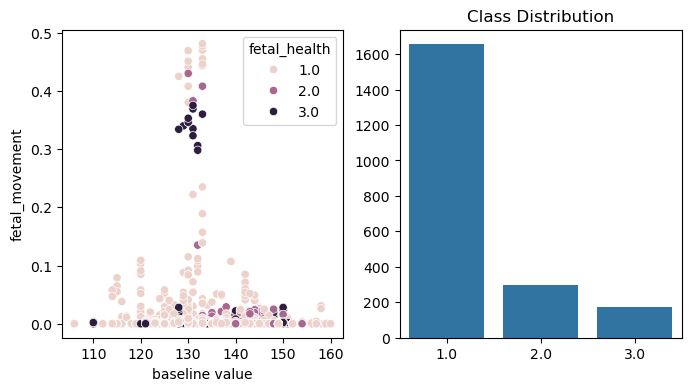

In [34]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,2],hue=y,ax=ax[0])
idx,c = np.unique(y,return_counts=True)
sns.barplot(x=idx,y=c, ax=ax[1])
# plt.xlabel("Class")
# plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X,y)

In [36]:
X_resampled

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,73.000000,0.500000,43.000000,...,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000
1,132.000000,0.006,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000
2,133.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000
3,134.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000
4,132.000000,0.007,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,144.969611,0.000,0.002657,0.000000,0.000000,0.0,0.000000,80.198587,0.211449,67.457951,...,13.000000,136.771025,149.771025,1.000000,0.000000,145.313074,143.656537,145.542049,1.000000,0.000000
4961,129.535356,0.000,0.132859,0.003384,0.003384,0.0,0.003384,34.383839,2.515152,0.000000,...,145.000000,54.000000,199.000000,10.232322,1.383839,75.000000,94.929289,82.929289,128.646445,-1.000000
4962,130.212257,0.000,0.003650,0.003825,0.000912,0.0,0.001369,73.962797,1.366849,3.631290,...,62.525162,72.493440,135.018602,1.368710,0.000000,126.106129,122.456237,126.193656,6.649892,1.000000
4963,125.321477,0.000,0.001107,0.002369,0.002952,0.0,0.001107,77.726099,0.942864,3.154735,...,68.000000,67.904848,135.904848,2.583371,0.000000,121.630947,119.785682,121.892841,7.428636,0.630947


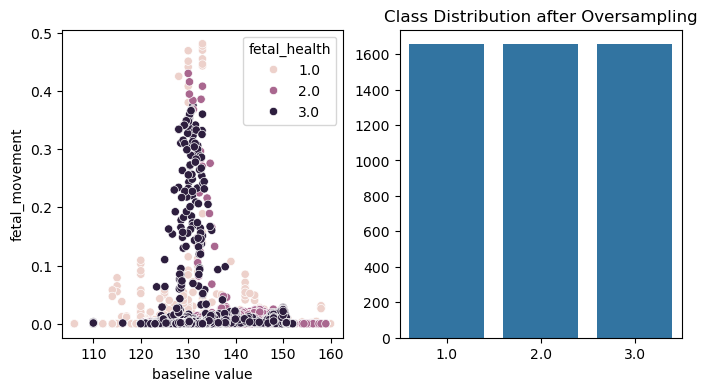

In [37]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.scatterplot(x=X_resampled.iloc[:,0],y=X_resampled.iloc[:,2],hue=y_resampled,ax=ax[0])
idx,c = np.unique(y_resampled,return_counts=True)
sns.barplot(x=idx,y=c, ax=ax[1])
# plt.xlabel("Class")
# plt.ylabel("Frequency")
plt.title("Class Distribution after Oversampling")
plt.show()


In [38]:
# Creating CSV from the oversampled data
# resampled_df = pd.DataFrame(X_resampled)
# # Adding the target column in the dataset
# resampled_df['Target'] = y_resampled
# resampled_df.to_csv('/content/drive/MyDrive/FHP/Data_with_SMOTE.csv', index=False)

**Train, Test and Split**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [40]:
X_train.shape, X_test.shape

((3475, 21), (1490, 21))

**Standard Scaler**

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

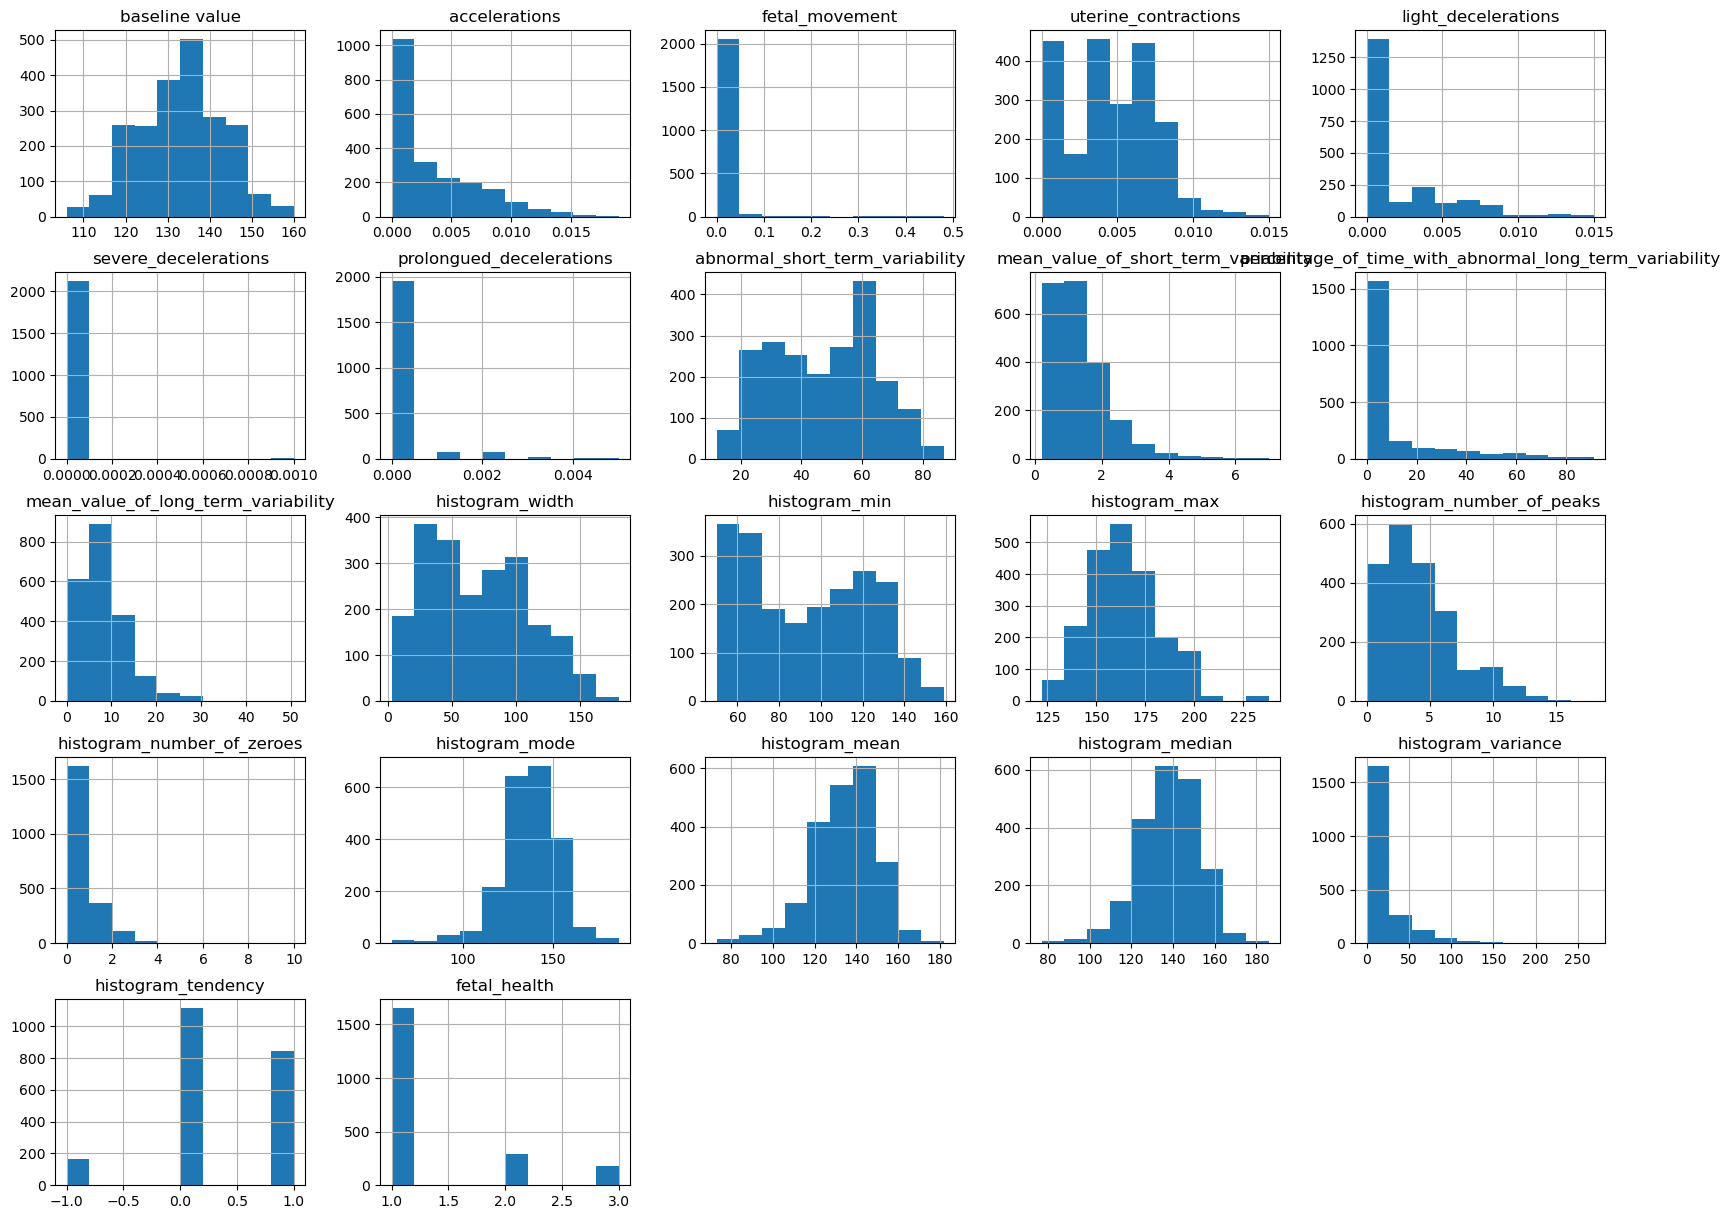

In [43]:
# visualizing all as histogram
df.hist(figsize=(20,15))
plt.show()

In [44]:
correlated_features = set()
correlation_matrix = df.corr()

In [45]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [46]:
print(correlated_features)

{'histogram_mode', 'histogram_median', 'histogram_min', 'histogram_mean', 'histogram_number_of_peaks'}


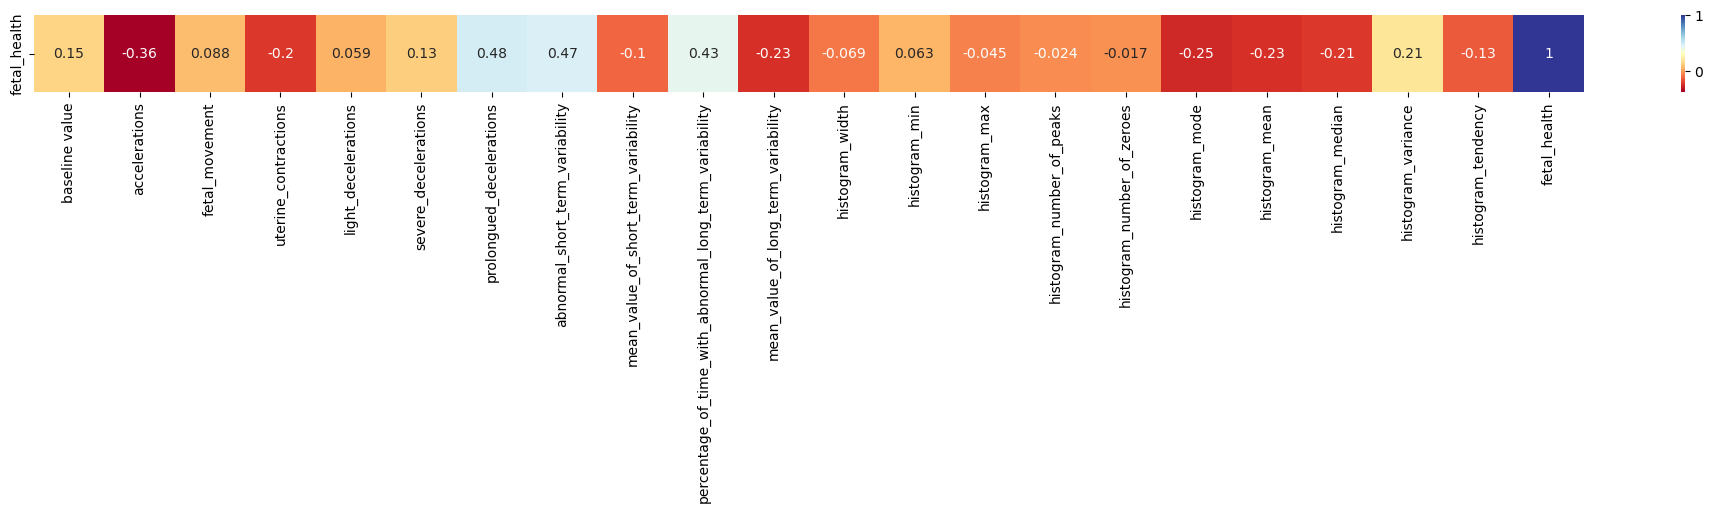

In [47]:
plt.subplots(figsize=(25,1))
sns.heatmap(correlation_matrix.sort_values(by=["fetal_health"], ascending=False).head(1),annot=True, cmap="RdYlBu")
plt.show()

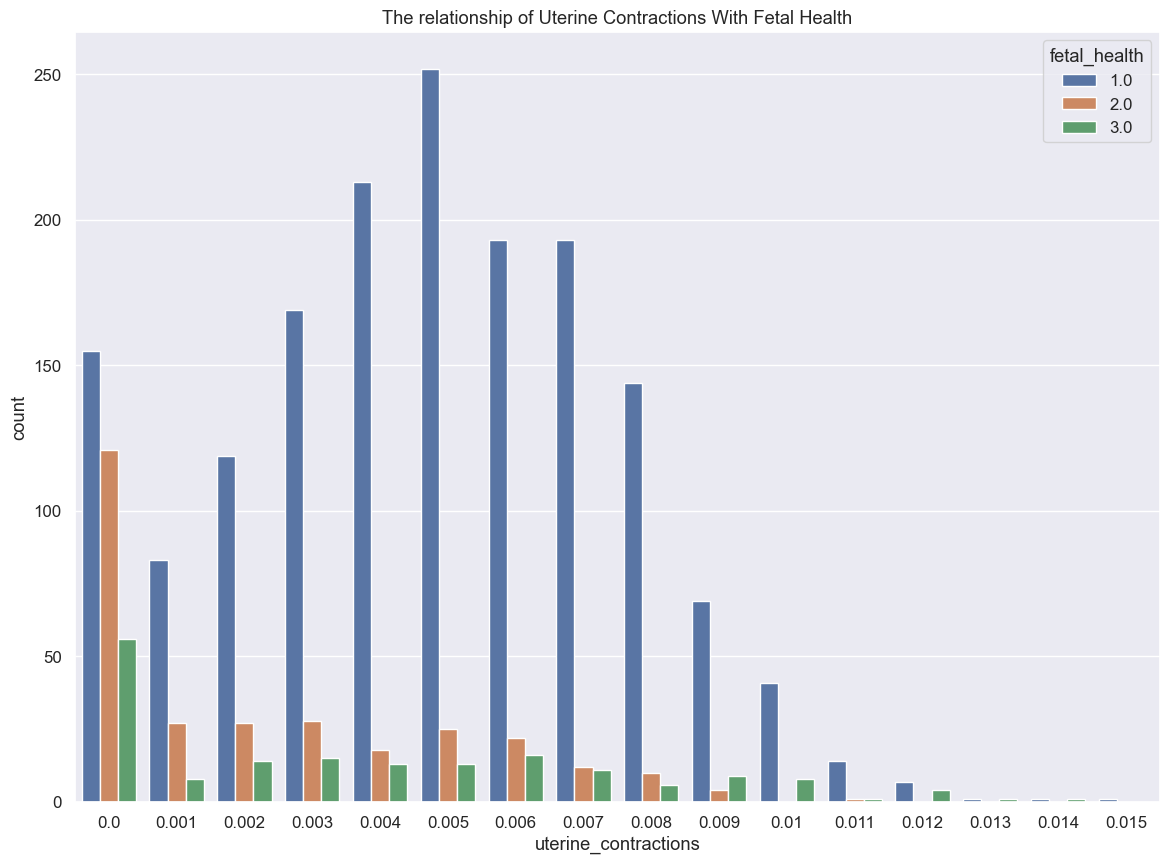

In [48]:
plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=df, x='uterine_contractions', hue='fetal_health', palette='deep').set_title('The relationship of Uterine Contractions With Fetal Health');

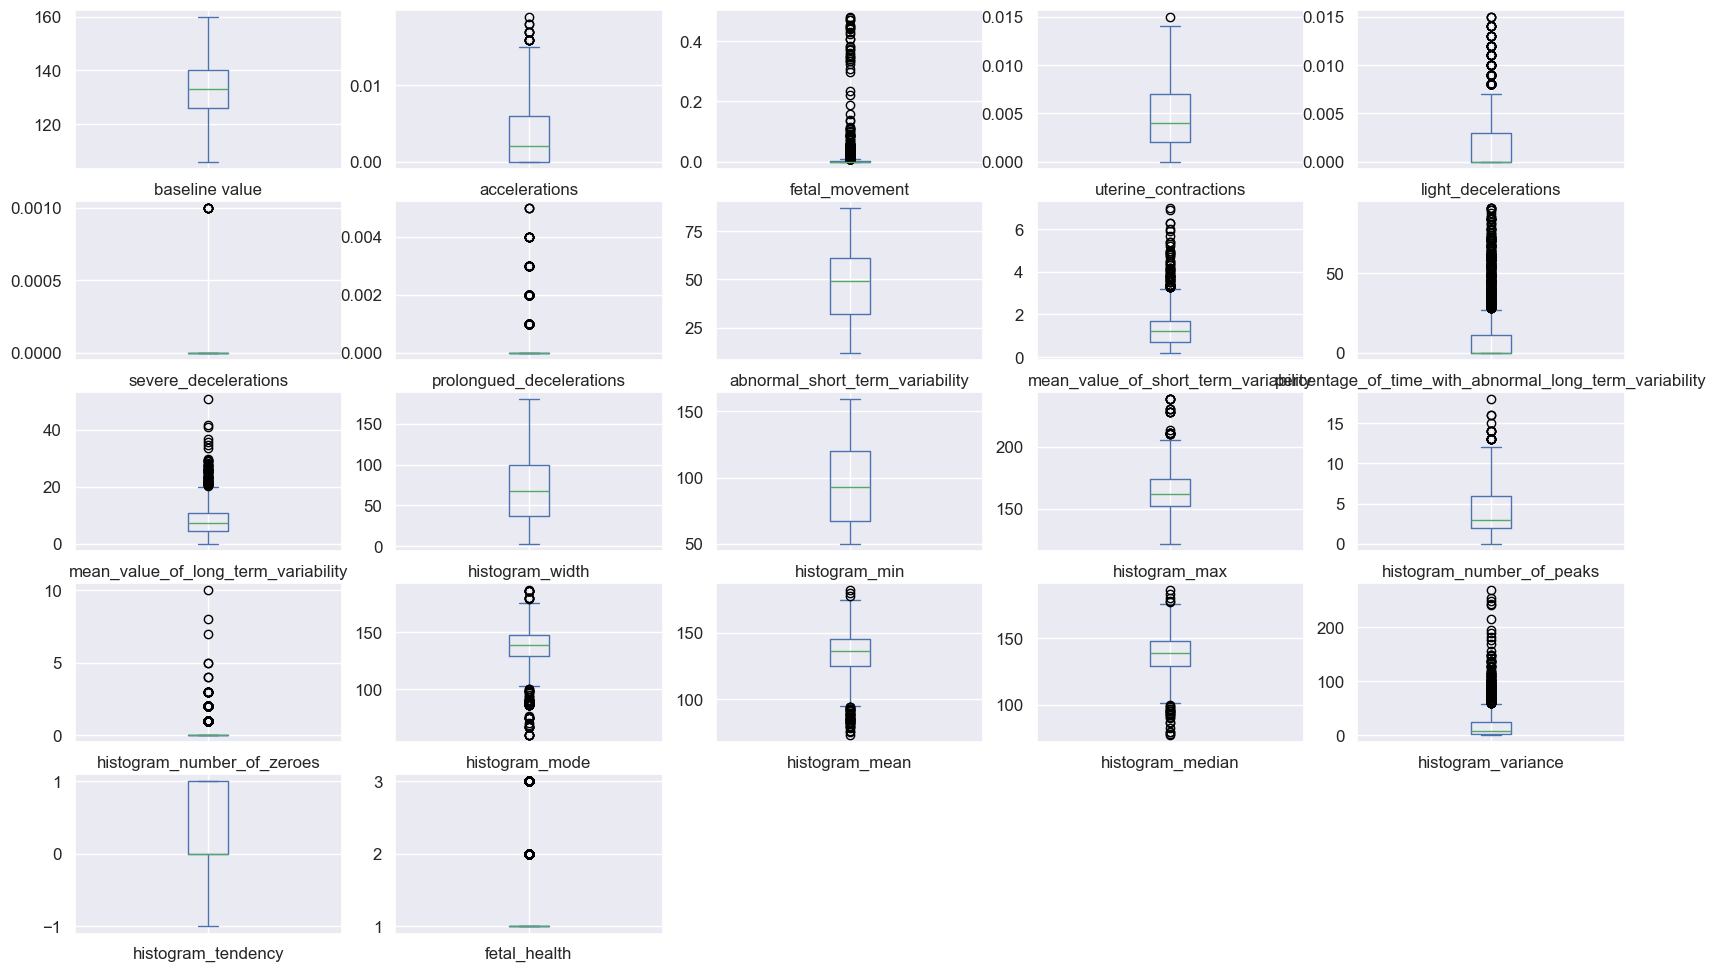

In [49]:
#Checking outliers
df.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

In [50]:
X_ind = df.iloc[:,0:21]  #independent columns
y_dep = df.iloc[:,-1]

In [51]:
# oversampling with SMOTE after outliers are fixed
X_oversampled, y_oversampled = SMOTE(random_state=42).fit_resample(X_ind,y_dep)

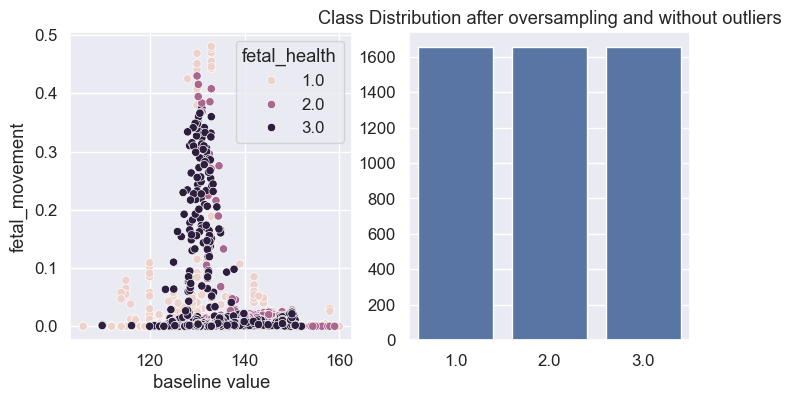

In [52]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.scatterplot(x=X_oversampled.iloc[:,0],y=X_oversampled.iloc[:,2],hue=y_oversampled,ax=ax[0])
idx,c = np.unique(y_oversampled,return_counts=True)
sns.barplot(x=idx,y=c, ax=ax[1])
# plt.xlabel("Class")
# plt.ylabel("Frequency")
plt.title("Class Distribution after oversampling and without outliers")
plt.show()

In [53]:
#Creating CSV from the oversampled data
new_df = pd.DataFrame(X_oversampled)
# Adding the target column in the dataset
new_df['target'] = y_oversampled
#new_df.to_csv('/content/drive/MyDrive/FHP/Dataset_SMOTE_MC.csv', index=False)

In [54]:

# Function to apply capping technique to a column based on the IQR
def cap_outliers(new_df_capping, column_name):

  percentile25 = new_df_capping[column_name].quantile(0.25)
  percentile75 = new_df_capping[column_name].quantile(0.75)
  iqr = percentile75 - percentile25
  lower_bound = percentile25 - 1.5 * iqr
  upper_bound = percentile75 + 1.5 * iqr

  # Cap values below the lower bound
  new_df_capping[column_name] = new_df_capping[column_name].apply(lambda x: lower_bound if x < lower_bound else x)

  # Cap values above the upper bound
  new_df_capping[column_name] = new_df_capping[column_name].apply(lambda x: upper_bound if x > upper_bound else x)


# Apply capping technique to each column based on the specified thresholds
new_df_capping = new_df.copy()
for column in new_df_capping.columns:
    cap_outliers(new_df_capping, column)


In [55]:
# The DataFrame now has outliers capped based on the specified thresholds
new_df_capping

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.0
1,132.000000,0.005,0.000000,0.006000,0.003000,0.0,0.0,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,0.569969,141.000000,136.000000,140.000000,12.000000,0.000000,1.0
2,133.000000,0.003,0.000000,0.008000,0.003000,0.0,0.0,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,0.569969,141.000000,135.000000,138.000000,13.000000,0.000000,1.0
3,134.000000,0.003,0.000000,0.008000,0.003000,0.0,0.0,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.0
4,132.000000,0.005,0.000000,0.008000,0.000000,0.0,0.0,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,144.969611,0.000,0.002657,0.000000,0.000000,0.0,0.0,80.198587,0.211449,67.457951,...,136.771025,149.771025,1.000000,0.000000,145.313074,143.656537,145.542049,1.000000,0.000000,3.0
4961,129.535356,0.000,0.010000,0.003384,0.003384,0.0,0.0,34.383839,2.515152,0.000000,...,54.000000,199.000000,10.232322,0.569969,89.061035,94.929289,86.500000,76.000000,-1.000000,3.0
4962,130.212257,0.000,0.003650,0.003825,0.000912,0.0,0.0,73.962797,1.366849,3.631290,...,72.493440,135.018602,1.368710,0.000000,126.106129,122.456237,126.193656,6.649892,1.000000,3.0
4963,125.321477,0.000,0.001107,0.002369,0.002952,0.0,0.0,77.726099,0.942864,3.154735,...,67.904848,135.904848,2.583371,0.000000,121.630947,119.785682,121.892841,7.428636,0.630947,3.0


/var/folders/1h/ksk5t4_x2f92_j94rc78pgxw0000gn/T/ipykernel_28783/2594820535.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/1h/ksk5t4_x2f92_j94rc78pgxw0000gn/T/ipykernel_28783/2594820535.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




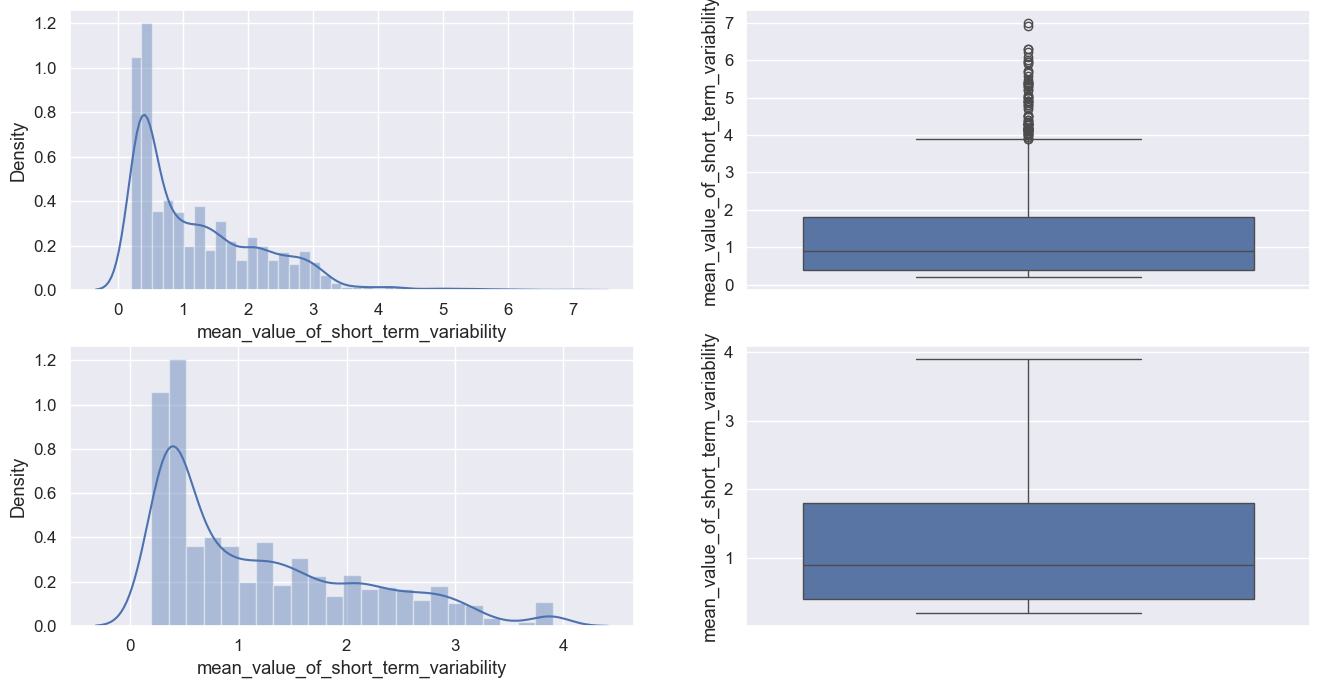

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['mean_value_of_short_term_variability'])

plt.subplot(2,2,2)
sns.boxplot(new_df['mean_value_of_short_term_variability'])

plt.subplot(2,2,3)
sns.distplot(new_df_capping['mean_value_of_short_term_variability'])

plt.subplot(2,2,4)
sns.boxplot(new_df_capping['mean_value_of_short_term_variability'])

plt.show()

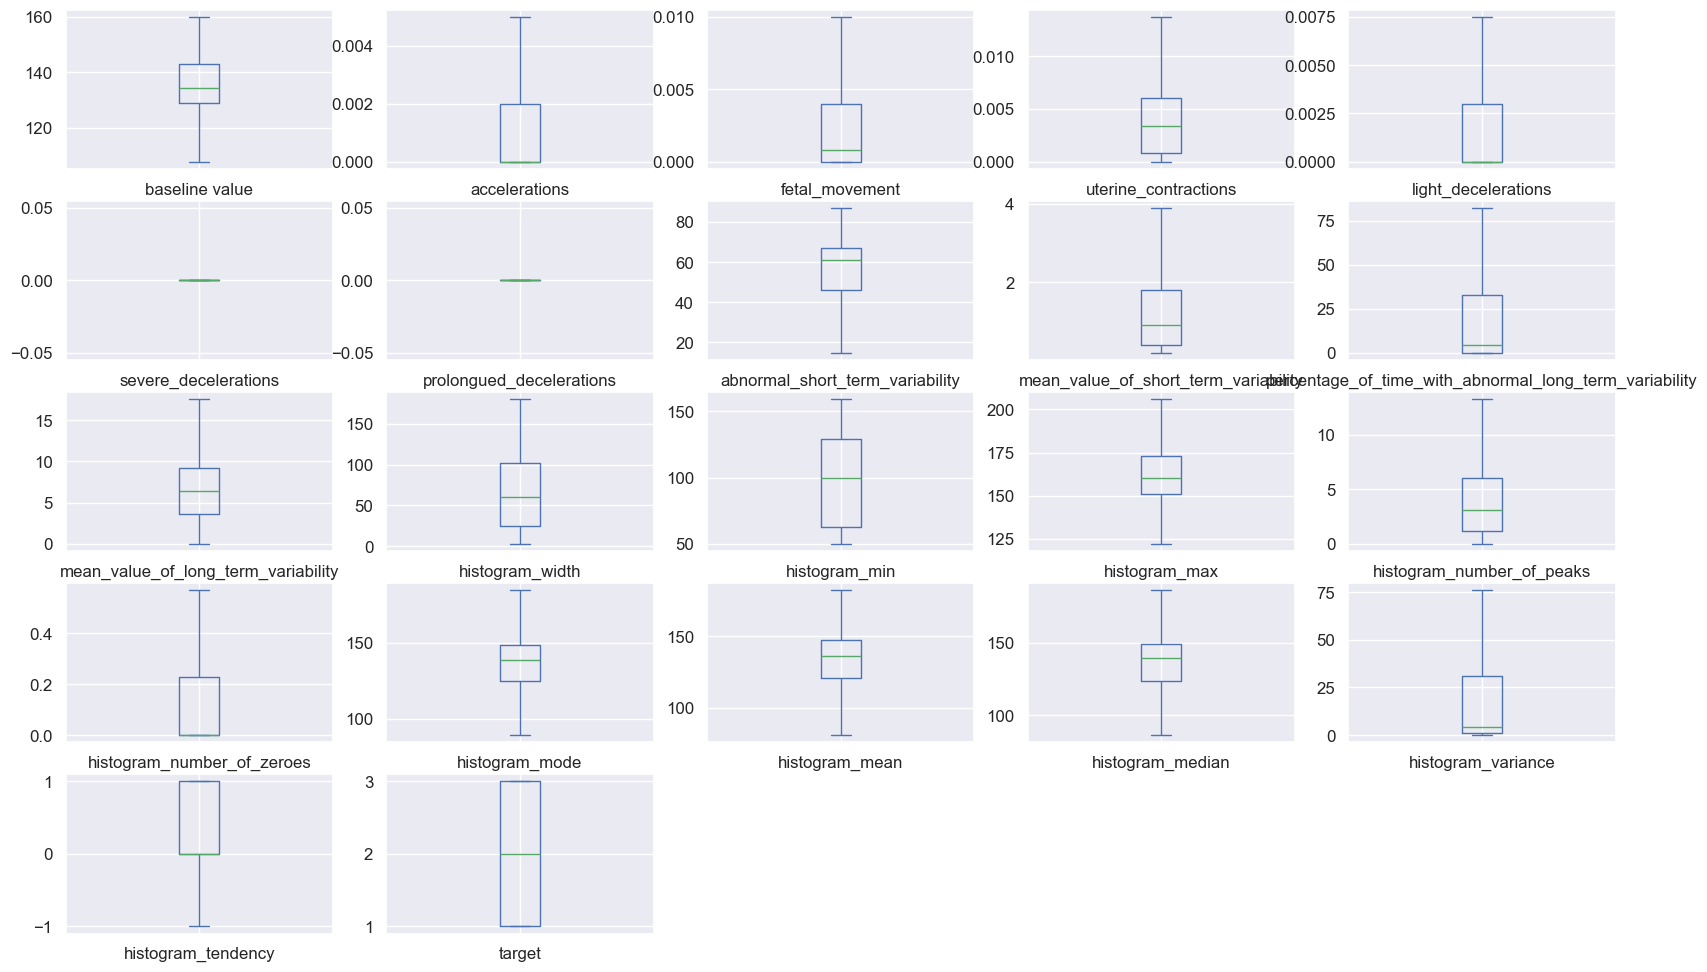

In [57]:
#Checking outliers
new_df_capping.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

In [312]:
# save the dataset with multi-class
#new_df_capping.to_csv('/content/drive/MyDrive/FHP/Dataset_SMOTE_MC.csv', index=False)

In [58]:
# Choose a specific class to transform into a binary class (e.g., class '1')
chosen_class = 1.0

# Create a binary target variable where instances of the chosen class are labeled as 1, and others as 0
new_df_capping['binary_target'] = (new_df_capping['target'] == chosen_class).astype(int)

In [59]:
new_df_capping

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target,binary_target
0,120.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,73.000000,0.500000,43.000000,...,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.0,0
1,132.000000,0.005,0.000000,0.006000,0.003000,0.0,0.0,17.000000,2.100000,0.000000,...,198.000000,6.000000,0.569969,141.000000,136.000000,140.000000,12.000000,0.000000,1.0,1
2,133.000000,0.003,0.000000,0.008000,0.003000,0.0,0.0,16.000000,2.100000,0.000000,...,198.000000,5.000000,0.569969,141.000000,135.000000,138.000000,13.000000,0.000000,1.0,1
3,134.000000,0.003,0.000000,0.008000,0.003000,0.0,0.0,16.000000,2.400000,0.000000,...,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.0,1
4,132.000000,0.005,0.000000,0.008000,0.000000,0.0,0.0,16.000000,2.400000,0.000000,...,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,144.969611,0.000,0.002657,0.000000,0.000000,0.0,0.0,80.198587,0.211449,67.457951,...,149.771025,1.000000,0.000000,145.313074,143.656537,145.542049,1.000000,0.000000,3.0,0
4961,129.535356,0.000,0.010000,0.003384,0.003384,0.0,0.0,34.383839,2.515152,0.000000,...,199.000000,10.232322,0.569969,89.061035,94.929289,86.500000,76.000000,-1.000000,3.0,0
4962,130.212257,0.000,0.003650,0.003825,0.000912,0.0,0.0,73.962797,1.366849,3.631290,...,135.018602,1.368710,0.000000,126.106129,122.456237,126.193656,6.649892,1.000000,3.0,0
4963,125.321477,0.000,0.001107,0.002369,0.002952,0.0,0.0,77.726099,0.942864,3.154735,...,135.904848,2.583371,0.000000,121.630947,119.785682,121.892841,7.428636,0.630947,3.0,0


In [60]:
# save the dataset with binary-class
#new_df_capping.to_csv('/content/drive/MyDrive/FHP/Dataset_SMOTE_BC.csv', index=False)

# **Feature Selection Methods**

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [62]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]

In [63]:
#apply SelectKBest class to extract feature importance
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

In [64]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [65]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']

In [66]:
f_sorted=featureScores.sort_values(by='Score', ascending=False)
f_sorted

,Specs,Score
9,percentage_of_time_with_abnormal_long_term_var...,17921.988734
19,histogram_variance,11801.125508
7,abnormal_short_term_variability,3270.412869
11,histogram_width,2258.452116
12,histogram_min,1508.513834
16,histogram_mode,853.916249
17,histogram_mean,840.587696
18,histogram_median,611.460461
10,mean_value_of_long_term_variability,509.803048
0,baseline value,180.585610


In [67]:
from sklearn.feature_selection import mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k='all')
fit = bestfeatures.fit(X,y)

In [68]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [69]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']

In [70]:
f_sorted=featureScores.sort_values(by='Score', ascending=False)
f_sorted

,Specs,Score
9,percentage_of_time_with_abnormal_long_term_var...,0.199564
8,mean_value_of_short_term_variability,0.199213
7,abnormal_short_term_variability,0.190832
17,histogram_mean,0.163418
18,histogram_median,0.162398
16,histogram_mode,0.148893
19,histogram_variance,0.144225
11,histogram_width,0.143493
12,histogram_min,0.126529
1,accelerations,0.123945


In [71]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [72]:
print(model.feature_importances_)

[0.04430829 0.06202836 0.02958626 0.05252886 0.01622471 0.00249442
 0.06054548 0.12384301 0.07052384 0.12833003 0.04036201 0.03794061
 0.04380971 0.03198063 0.02336156 0.01113937 0.05481075 0.07499117
 0.05455584 0.03663508]


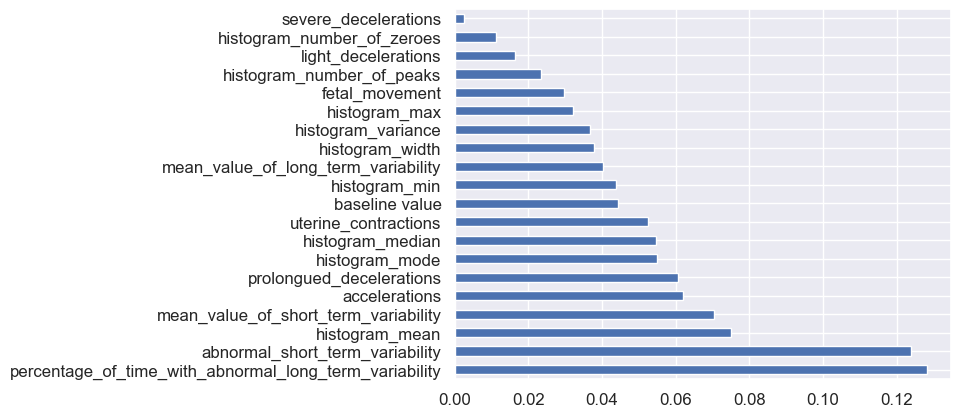

In [73]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Creating data for ensemble technique

## Multiclass

In [74]:
dataset2 = pd.read_csv(f'{path}/For_Ensemble_Approach/Dataset_without_outliers.csv')
dataset2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,27.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2


In [45]:
# # Choose a specific class to transform into a binary class (e.g., class '1')
# chosen_class = 1

# # Create a binary target variable where instances of the chosen class are labeled as 1, and others as 0
# dataset2['binary_target'] = (dataset2['target'] == chosen_class).astype(int)

In [75]:
dataset2.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.0,0.000,0.0,0.000,0.0000,0.0,0.0,73.0,0.5,27.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2
1,132.0,0.006,0.0,0.006,0.0030,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.0030,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.0030,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.0000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1
5,134.0,0.001,0.0,0.010,0.0075,0.0,0.0,26.0,3.2,0.0,...,50.0,200.0,5.0,0.0,100.5,107.0,107.0,57.0,0.0,3
6,134.0,0.001,0.0,0.013,0.0075,0.0,0.0,29.0,3.2,0.0,...,50.0,200.0,6.0,0.0,100.5,107.0,106.0,57.0,0.0,3
7,122.0,0.000,0.0,0.000,0.0000,0.0,0.0,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3
8,122.0,0.000,0.0,0.002,0.0000,0.0,0.0,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3
9,122.0,0.000,0.0,0.003,0.0000,0.0,0.0,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3


In [47]:
# dataset2.to_csv('Dataset_without_outliers_both_class.csv')

In [76]:
data_ml = pd.read_csv(f'{path}/For_Ensemble_Approach/Dataset_without_outliers_both_class.csv')
data_ml.drop('Unnamed: 0', axis=1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target,binary_target
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,27.5,...,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2,0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2,0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2,0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2,0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2,0


In [4]:
# Assuming 'fetal_health' is the column containing class labels
class_one_data = data_ml[data_ml['target'] == 1]
class_one_data = class_one_data.drop('Unnamed: 0', axis=1)
class_one_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target,binary_target
1,132.0,0.006,0.0000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,0.0,141.0,136.0,140.0,12.0,0.0,1,1
2,133.0,0.003,0.0000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,0.0,141.0,135.0,138.0,13.0,0.0,1,1
3,134.0,0.003,0.0000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1,1
4,132.0,0.007,0.0000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1,1
12,131.0,0.005,0.0075,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.0,0.000,0.0000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1,1
2118,140.0,0.000,0.0000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1,1
2119,140.0,0.000,0.0000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1,1
2120,140.0,0.000,0.0000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1,1


In [5]:
chunk_size = 206 # Number of rows per chunk
dataset_length = 1442 # using 1442 for having 206 instances for all the chunks after 1442 everythig will go for testing
num_chunks = dataset_length // chunk_size
chunks = np.array_split(class_one_data.iloc[:1442,:22], num_chunks)

/Users/muntaqimahmedraju/miniforge3/envs/pythonhub/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
len(chunks)

7

In [108]:
# i=1
# for chunk in chunks:
#     chunk.to_csv(f"chunk_{i}.csv")
#     i=i+1

In [6]:
last_chunk = class_one_data.iloc[1442:,:22]
#last_chunk.to_csv("test_chunk_class1")
last_chunk

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
1859,138.0,0.015,0.000,0.004,0.000,0.0,0.0,51.0,0.9,0.0,...,122.0,171.0,4.0,0.0,147.0,149.0,150.0,5.0,0.0,1
1860,138.0,0.015,0.000,0.004,0.000,0.0,0.0,51.0,0.9,0.0,...,122.0,171.0,2.0,0.0,147.0,148.0,149.0,5.0,0.0,1
1861,138.0,0.014,0.000,0.004,0.000,0.0,0.0,51.0,0.9,0.0,...,122.0,171.0,3.0,0.0,147.0,148.0,149.0,5.0,0.0,1
1862,138.0,0.015,0.000,0.000,0.000,0.0,0.0,51.0,1.0,0.0,...,107.0,171.0,2.0,0.0,147.0,148.0,149.0,7.0,0.0,1
1863,138.0,0.014,0.000,0.003,0.000,0.0,0.0,51.0,1.0,0.0,...,107.0,171.0,3.0,0.0,147.0,148.0,149.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.0,0.000,0.000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1
2118,140.0,0.000,0.000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1


In [7]:
# Assuming 'fetal_health' is the column containing class labels
class_two_data = data_ml[data_ml['target'] == 2]
class_two_data = class_two_data.drop('Unnamed: 0', axis=1)
slice = class_two_data.iloc[:155,:22]
slice

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.0,0.000,0.0000,0.000,0.0000,0.0,0.0,73.0,0.5,27.5,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,57.0,1.0,2
10,151.0,0.000,0.0000,0.001,0.0010,0.0,0.0,64.0,1.9,9.0,...,56.0,186.0,2.0,0.0,150.0,148.0,151.0,9.0,1.0,2
11,150.0,0.000,0.0000,0.001,0.0010,0.0,0.0,64.0,2.0,8.0,...,56.0,186.0,5.0,0.0,150.0,148.0,151.0,10.0,1.0,2
17,131.0,0.002,0.0075,0.003,0.0050,0.0,0.0,18.0,2.4,0.0,...,67.0,174.0,5.0,0.0,134.0,125.0,132.0,45.0,0.0,2
28,132.0,0.000,0.0075,0.001,0.0075,0.0,0.0,29.0,3.2,0.0,...,50.0,191.0,7.0,0.0,133.0,119.0,129.0,57.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,142.0,0.000,0.0040,0.000,0.0000,0.0,0.0,68.0,0.3,27.5,...,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2
446,142.0,0.000,0.0060,0.000,0.0000,0.0,0.0,69.0,0.3,27.5,...,137.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2
447,142.0,0.000,0.0040,0.000,0.0000,0.0,0.0,68.0,0.3,27.5,...,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,2
461,120.0,0.000,0.0020,0.000,0.0000,0.0,0.0,69.0,0.3,21.0,...,114.0,133.0,2.0,0.0,120.0,120.0,121.0,0.0,-1.0,2


In [8]:
# Assuming 'fetal_health' is the column containing class labels
class_three_data = data_ml[data_ml['target'] == 3]
class_three_data = class_three_data.drop('Unnamed: 0', axis=1)
piece = class_three_data.iloc[:100,:22]
piece

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
5,134.0,0.001,0.000,0.010,0.0075,0.0,0.0,26.0,3.2,0.0,...,50.0,200.0,5.0,0.0,100.5,107.0,107.0,57.0,0.0,3
6,134.0,0.001,0.000,0.013,0.0075,0.0,0.0,29.0,3.2,0.0,...,50.0,200.0,6.0,0.0,100.5,107.0,106.0,57.0,0.0,3
7,122.0,0.000,0.000,0.000,0.0000,0.0,0.0,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3
8,122.0,0.000,0.000,0.002,0.0000,0.0,0.0,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3
9,122.0,0.000,0.000,0.003,0.0000,0.0,0.0,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,131.0,0.000,0.003,0.003,0.0075,0.0,0.0,67.0,1.7,0.0,...,78.0,146.0,7.0,0.0,121.0,116.0,120.0,15.0,0.0,3
1727,134.0,0.000,0.000,0.009,0.0060,0.0,0.0,64.0,1.5,0.0,...,83.0,153.0,5.0,0.0,137.0,119.0,124.0,50.0,1.0,3
1749,134.0,0.002,0.002,0.000,0.0020,0.0,0.0,63.0,1.5,0.0,...,71.0,171.0,4.0,0.0,100.5,105.0,105.0,57.0,-1.0,3
1750,134.0,0.005,0.002,0.002,0.0030,0.0,0.0,62.0,1.5,0.0,...,71.0,184.0,4.0,0.0,100.5,113.0,110.0,57.0,-1.0,3


In [19]:
training_set = pd.concat([chunks[6], slice, piece], axis=0)
shuffle = training_set.sample(frac=1, random_state=42)
#shuffle.to_csv("training_set_7_without_outliers.csv")
shuffle

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
125,159.0,0.000,0.0000,0.003,0.000,0.0,0.0,65.0,0.4,16.0,...,81.0,172.0,0.0,0.0,163.0,163.0,165.0,2.0,1.0,2
1645,130.0,0.009,0.0000,0.005,0.005,0.0,0.0,51.0,1.5,0.0,...,77.0,178.0,7.0,0.0,130.0,135.0,137.0,39.0,0.0,1
1654,114.0,0.000,0.0000,0.009,0.000,0.0,0.0,65.0,0.5,0.0,...,102.0,126.0,1.0,0.0,115.0,115.0,116.0,1.0,0.0,1
97,148.0,0.000,0.0010,0.000,0.001,0.0,0.0,60.0,0.5,27.5,...,78.0,161.0,3.0,0.0,154.0,152.0,154.0,1.0,1.0,2
1747,134.0,0.011,0.0000,0.010,0.004,0.0,0.0,56.0,1.4,0.0,...,86.0,187.0,5.0,0.0,151.0,152.0,160.0,44.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,134.0,0.008,0.0000,0.010,0.005,0.0,0.0,60.0,1.1,0.0,...,80.0,189.0,8.0,0.0,156.0,145.0,154.0,57.0,1.0,1
306,145.0,0.000,0.0075,0.000,0.000,0.0,0.0,77.0,0.2,27.5,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2
435,151.0,0.000,0.0000,0.008,0.005,0.0,0.0,60.0,0.9,17.0,...,50.0,174.0,8.0,0.0,156.0,148.0,155.0,37.0,1.0,2
768,135.0,0.000,0.0000,0.000,0.000,0.0,0.0,68.0,0.3,27.5,...,133.0,143.0,1.0,0.0,137.0,136.0,138.0,0.0,0.0,3


In [23]:
test_piece = class_three_data.iloc[100:,:22]
test_slice = class_two_data.iloc[155:,:22]
testing_set = pd.concat([last_chunk, test_slice, test_piece], axis=0)
test_shuffle = testing_set.sample(frac=1, random_state=42)
test_shuffle.to_csv("testing_set_without_outliers.csv")
test_shuffle

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
2033,129.0,0.000,0.001,0.007,0.0060,0.0,0.0,67.0,3.2,0.0,...,66.0,146.0,7.0,0.0,105.0,95.0,107.0,9.0,0.0,3
1967,138.0,0.010,0.000,0.006,0.0000,0.0,0.0,57.0,0.8,0.0,...,127.0,178.0,3.0,0.0,149.0,150.0,150.0,10.0,0.0,1
2085,128.0,0.001,0.003,0.006,0.0000,0.0,0.0,78.0,1.2,27.5,...,124.0,151.0,2.0,0.0,128.0,127.0,130.0,1.0,-1.0,1
1893,139.0,0.007,0.002,0.011,0.0070,0.0,0.0,55.0,1.4,0.0,...,95.0,166.0,5.0,0.0,161.0,140.0,147.0,57.0,1.0,1
1763,120.0,0.000,0.000,0.004,0.0075,0.0,0.0,59.0,1.6,0.0,...,69.0,152.0,4.0,0.0,105.0,106.0,107.0,31.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,133.0,0.000,0.004,0.005,0.0040,0.0,0.0,62.0,2.2,0.0,...,62.0,165.0,3.0,0.0,129.0,117.0,128.0,44.0,0.0,1
1998,125.0,0.000,0.001,0.009,0.0075,0.0,0.0,63.0,1.6,0.0,...,68.0,138.0,4.0,0.0,130.0,116.0,124.0,32.0,1.0,1
772,130.0,0.000,0.003,0.000,0.0030,0.0,0.0,74.0,0.4,27.5,...,105.0,165.0,6.0,0.0,131.0,128.0,131.0,3.0,0.0,2
2086,133.0,0.000,0.003,0.006,0.0000,0.0,0.0,74.0,1.3,27.5,...,119.0,150.0,7.0,0.0,136.0,134.0,137.0,1.0,0.0,2


# Binary Class

In [271]:
data_ml = pd.read_csv(f'{path}/For_Ensemble_Approach/Dataset_with_outliers_both_class.csv')
data_ml.drop('Unnamed: 0', axis=1)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,binary_target
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0,0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0,0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,0


In [272]:
# Assuming 'fetal_health' is the column containing class labels
first_class = data_ml[data_ml['binary_target'] == 1]
first_class = first_class.drop(['Unnamed: 0','fetal_health'], axis=1)
first_class

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,binary_target
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.0,0.000,0.000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1
2118,140.0,0.000,0.000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1


In [273]:
chunk_size = 280 # Number of rows per chunk
dataset_length = 1400 # using 1500 for having 300 instances for all the chunks after 1442 everythig will go for testing
num_chunks = dataset_length // chunk_size
chunks = np.array_split(first_class.iloc[:1400,:], num_chunks)

/Users/muntaqimahmedraju/miniforge3/envs/pythonhub/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [274]:
num_chunks

5

In [275]:
# for i in chunks:
#     print(i)

In [276]:
last_chunk_binary = first_class.iloc[1400:,:22]
last_chunk_binary

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,binary_target
1817,139.0,0.009,0.000,0.006,0.000,0.0,0.0,54.0,1.0,0.0,...,96.0,189.0,6.0,0.0,144.0,150.0,150.0,25.0,0.0,1
1818,139.0,0.011,0.001,0.007,0.000,0.0,0.0,53.0,1.5,0.0,...,97.0,204.0,7.0,0.0,152.0,155.0,153.0,39.0,0.0,1
1819,139.0,0.011,0.001,0.005,0.000,0.0,0.0,52.0,1.6,0.0,...,97.0,204.0,8.0,0.0,138.0,155.0,153.0,77.0,0.0,1
1820,141.0,0.006,0.000,0.006,0.000,0.0,0.0,58.0,1.3,0.0,...,94.0,172.0,6.0,1.0,142.0,142.0,147.0,8.0,0.0,1
1821,141.0,0.001,0.000,0.007,0.000,0.0,0.0,65.0,0.5,1.0,...,133.0,157.0,1.0,0.0,150.0,147.0,149.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.0,0.000,0.000,0.008,0.000,0.0,0.0,79.0,0.3,20.0,...,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0,1
2118,140.0,0.000,0.000,0.006,0.001,0.0,0.0,79.0,0.5,26.0,...,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0,1
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.0,79.0,0.6,27.0,...,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1


In [277]:
# Assuming 'fetal_health' is the column containing class labels
second_class = data_ml[data_ml['binary_target'] == 0]
second_class = second_class.drop(['Unnamed: 0','fetal_health'], axis=1)
slice = second_class.iloc[:260,:22]
slice

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,binary_target
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,132.0,0.000,0.306,0.004,0.004,0.0,0.004,35.0,2.7,0.0,...,54.0,199.0,9.0,2.0,75.0,90.0,78.0,104.0,-1.0,0
683,132.0,0.000,0.298,0.002,0.002,0.0,0.004,37.0,2.3,0.0,...,54.0,165.0,5.0,1.0,75.0,87.0,77.0,86.0,-1.0,0
689,133.0,0.004,0.408,0.004,0.003,0.0,0.001,21.0,2.3,0.0,...,67.0,174.0,7.0,0.0,143.0,125.0,135.0,76.0,0.0,0
690,133.0,0.000,0.360,0.004,0.002,0.0,0.002,18.0,2.7,0.0,...,67.0,174.0,4.0,0.0,115.0,120.0,121.0,48.0,0.0,0


In [284]:
training_set = pd.concat([chunks[4], slice], axis=0)
shuffle = training_set.sample(frac=1, random_state=42)
#shuffle.to_csv(f'{path}/For_Ensemble_Approach//Binaryclass/with_outliers/training_set_5_with_outliers_binary_class.csv')
shuffle

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,binary_target
1736,134.0,0.005,0.001,0.007,0.004,0.0,0.0,61.0,1.2,0.0,...,90.0,173.0,4.0,0.0,150.0,143.0,148.0,19.0,1.0,1
1568,130.0,0.012,0.000,0.012,0.000,0.0,0.0,24.0,1.4,0.0,...,117.0,191.0,3.0,1.0,155.0,154.0,157.0,14.0,0.0,1
650,123.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.3,91.0,...,120.0,129.0,2.0,0.0,123.0,124.0,125.0,0.0,0.0,0
1581,132.0,0.001,0.000,0.005,0.004,0.0,0.0,29.0,1.5,1.0,...,61.0,153.0,4.0,1.0,133.0,129.0,134.0,23.0,1.0,1
445,142.0,0.000,0.004,0.000,0.000,0.0,0.0,68.0,0.3,39.0,...,136.0,151.0,1.0,0.0,142.0,142.0,143.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,145.0,0.003,0.000,0.006,0.000,0.0,0.0,48.0,0.7,2.0,...,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1
1603,138.0,0.005,0.000,0.002,0.000,0.0,0.0,18.0,4.2,0.0,...,114.0,176.0,4.0,0.0,157.0,149.0,151.0,13.0,0.0,1
1807,143.0,0.000,0.000,0.001,0.000,0.0,0.0,69.0,0.3,6.0,...,133.0,158.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0,1
395,143.0,0.000,0.000,0.001,0.000,0.0,0.0,63.0,0.5,35.0,...,120.0,157.0,5.0,1.0,146.0,145.0,146.0,2.0,1.0,0


In [285]:
test_slice = second_class.iloc[260:,:22]
testing_set = pd.concat([last_chunk_binary, test_slice], axis=0)
test_shuffle = testing_set.sample(frac=1, random_state=42)
test_shuffle.to_csv(f'{path}/For_Ensemble_Approach//Binaryclass/with_outliers/testing_set_with_outliers_binary_class.csv')
test_shuffle

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,binary_target
1872,138.0,0.003,0.002,0.006,0.007,0.0,0.000,50.0,2.3,0.0,...,70.0,172.0,7.0,0.0,138.0,135.0,140.0,26.0,1.0,1
1884,139.0,0.004,0.000,0.005,0.000,0.0,0.000,58.0,0.6,0.0,...,112.0,168.0,2.0,0.0,153.0,152.0,154.0,3.0,1.0,1
1850,138.0,0.009,0.000,0.003,0.001,0.0,0.000,51.0,1.3,0.0,...,73.0,171.0,8.0,0.0,148.0,145.0,147.0,16.0,1.0,1
2086,133.0,0.000,0.003,0.006,0.000,0.0,0.000,74.0,1.3,28.0,...,119.0,150.0,7.0,0.0,136.0,134.0,137.0,1.0,0.0,0
1893,139.0,0.007,0.002,0.011,0.007,0.0,0.000,55.0,1.4,0.0,...,95.0,166.0,5.0,0.0,161.0,140.0,147.0,72.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,133.0,0.000,0.003,0.009,0.003,0.0,0.000,63.0,2.4,0.0,...,103.0,142.0,2.0,0.0,133.0,125.0,131.0,8.0,1.0,1
742,139.0,0.002,0.002,0.004,0.000,0.0,0.000,61.0,0.4,8.0,...,138.0,155.0,1.0,0.0,147.0,146.0,148.0,0.0,0.0,0
1429,144.0,0.000,0.000,0.005,0.000,0.0,0.000,43.0,0.7,1.0,...,129.0,169.0,1.0,0.0,157.0,154.0,156.0,3.0,0.0,0
1954,133.0,0.000,0.000,0.010,0.003,0.0,0.001,60.0,3.3,0.0,...,58.0,139.0,2.0,0.0,125.0,96.0,111.0,75.0,1.0,0
